# Data Science Task 5: Sales prediction using python

## Problem statement:
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.




# Loadind the dataset and EDA



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file = r"C:\Users\Kabelo\Documents\Minds\Oasis Infobyte\Oasis Infobyte Projects\Task 5\Advertising.csv"
sales_data = pd.read_csv(file)

## EDA: Exploratory Data Analysis
**EDA is required to:
- comprehend the data
- Clean the data
- analyze the realtionships between variables 

**UNDERSTANDING THE DATA:**

In [3]:
# Checking the first 5 rows
print(sales_data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
# Checking the last 5 rows
print(sales_data.tail())

     Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4


In [5]:
# Checking the total number of rows and columns
print(sales_data.shape)

(200, 5)


In [6]:
# Have a concise summary of the dataset, which helps determing missing values
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [7]:
# Verify that there are no missing values
print(sales_data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [8]:
# Removing the redundant column 
sales_data.drop("Unnamed: 0", axis = 1, inplace =True)


In [9]:
# Verify that the "Unnamed: 0" column has been removed
print(sales_data.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [10]:
# displaying basic stats of variables 
print(sales_data.describe().T)

           count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0


**VISUALIZING DATA:**

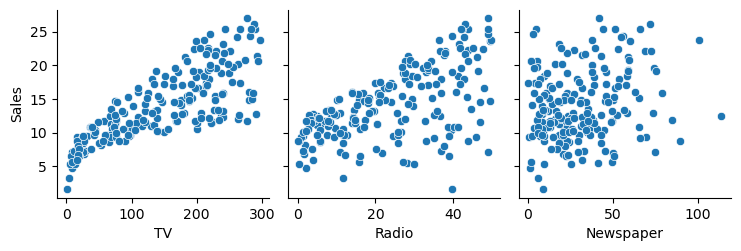

In [11]:
sns.pairplot(sales_data, x_vars=["TV", "Radio", "Newspaper",], y_vars="Sales")
plt.show()

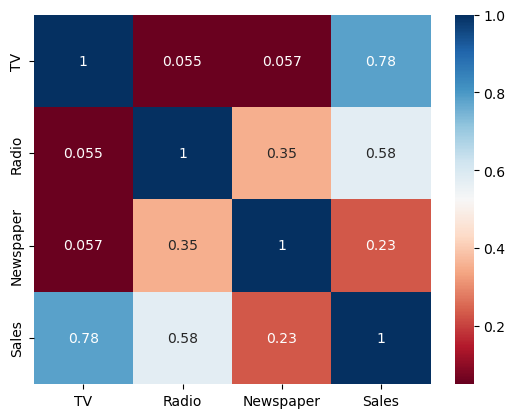

In [12]:
# heat maps to visualize correcations
correlations = sales_data.corr()
sns.heatmap(correlations, cmap="RdBu", vmin=0.05, vmax=1, annot=True)
plt.show()


**Note: From the pairplot we can see that there TV and radio gives positive upward trends with sales. while the newspaper produce a cluser meaning  no distinct trend. To clearly see the relationship, the hitmap is plotted which verify the insights displayed in the pairplot.**

# ML Model Training 

**IMPORTING REQUIRED MODULES:**

In [13]:
# Improting modules from scikitleran libarry
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Defining X & Y variables and split the data:**

In [14]:
# Defining the x and y variables
X = sales_data.drop(["Sales"], axis=1)
y = sales_data["Sales"]
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=20)

**Scale the data:**

In [15]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train the models:**

In [16]:
# Training Liner Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Training Gradient Booting Regressor Model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

# Taring Random Fostest Regressor Model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)


RandomForestRegressor()

**Predict the y values with trained models:**

In [17]:
y_pred_lr = linear_reg.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

**Evaluating the models:**

In [18]:
# determing the value of r2_score metric 
lr_score = metrics.r2_score(y_test, y_pred_lr)
gb_score = metrics.r2_score(y_test, y_pred_gb)
rf_score = metrics.r2_score(y_test, y_pred_rf)

#creating a pandas dataframe to have better view of the results
score_df = pd.DataFrame({"MODELS": ["Linear Regression", "Gradient Boosting", "Random Forest"],
             "SCORES" : [ lr_score, gb_score, rf_score]})
# Viewing the rscores
print(score_df)

              MODELS    SCORES
0  Linear Regression  0.903205
1  Gradient Boosting  0.984678
2      Random Forest  0.980791


**Gradient Boosting Model out perfomred the other two. Thus, this model will be used for sales predictions**

**SAVING THE GB MODEL:**

In [19]:
# Traing the whole data
gb_model = GradientBoostingRegressor()
gb_model.fit(X,y)

# Save the model 
import joblib
joblib.dump(gb_model, "Sales_predictor")


['Sales_predictor']